<a href="https://colab.research.google.com/github/KosukhaOlexandr/reactions_prediction/blob/main/reactions_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd

with open('/content/drive/MyDrive/reaction_prediction/tsn_reactions_dataset.csv') as f:
  data = pd.read_csv(f, index_col = 0)
  
with open('/content/drive/My Drive/reaction_prediction/tsn_reactions_dataset_from_2_jul.csv') as f:
  data_from_2_jul = pd.read_csv(f, index_col = 0)

In [3]:
data = pd.concat([data.reset_index(drop=True), data_from_2_jul.reset_index(drop=True)], axis = 0)

In [4]:
data.head()

,msg_text,clown_face,thumbs_up,thumbs_down,red_heart,fire,smiling_face_with_hearts,clapping_hands,beaming_face_with_smiling_eyes,thinking_face,exploding_head,face_screaming_in_fear,face_with_symbols_on_mouth,crying_face,party_popper,star-struck,face_vomiting,pile_of_poo
0,чий борщ у п’ятницю 1 липня юнеско вирішить до...,0.0,0.046779,0.000000,0.720624,0.004455,0.019677,0.004270,0.142565,0.013922,0.036570,0.0,0.007611,0.001114,0.002413,0.0,0.000000,0.000000
1,зруйнований міст у демидові на київщині планую...,0.0,0.807922,0.002555,0.081772,0.011499,0.004259,0.001278,0.002981,0.058773,0.000000,0.0,0.000000,0.024702,0.000000,0.0,0.001278,0.002981
2,безперечно головне слово сьогодні зміїний мабу...,0.0,0.750110,0.002428,0.168874,0.015673,0.031788,0.023179,0.001987,0.001987,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.003974,0.000000
3,прокремлівське видання общественная служба нов...,0.0,0.081781,0.001136,0.001817,0.006815,0.002953,0.011586,0.814630,0.004998,0.034757,0.0,0.006134,0.000000,0.000000,0.0,0.033394,0.000000
4,продовжується відвантаження боєприпасів продов...,0.0,0.453347,0.006853,0.007380,0.007380,0.000000,0.002636,0.003163,0.033737,0.055351,0.0,0.397470,0.018977,0.000000,0.0,0.013706,0.000000


In [5]:
data.shape

(21455, 18)

For this model we will divide reactions into two categories: 
- positive - 1 
- negative - 0

Positive consist of 👍, 👎, ❤, 🔥, 🥰, 👏, 😁, 🤯, 🎉, 🤩

Negative consist of 🤡, 🤔, 😱, 🤬, 😢, 🤮, 💩

In [6]:
data.columns

Index(['msg_text', 'clown_face', 'thumbs_up', 'thumbs_down', 'red_heart',
       'fire', 'smiling_face_with_hearts', 'clapping_hands',
       'beaming_face_with_smiling_eyes', 'thinking_face', 'exploding_head',
       'face_screaming_in_fear', 'face_with_symbols_on_mouth', 'crying_face',
       'party_popper', 'star-struck', 'face_vomiting', 'pile_of_poo'],
      dtype='object')

In [7]:
pos_reacts = ['thumbs_up', 'thumbs_down', 'red_heart', 'fire', 'smiling_face_with_hearts', 'clapping_hands',
             'beaming_face_with_smiling_eyes', 'exploding_head', 'party_popper', 'star-struck']
neg_reacts = ['clown_face', 'thinking_face', 'face_screaming_in_fear', 'face_with_symbols_on_mouth', 'crying_face',
              'face_vomiting', 'pile_of_poo']

In [8]:
data['pos_sum'] = data[pos_reacts].sum(axis = 1)
data['neg_sum'] = data[neg_reacts].sum(axis = 1)
data.loc[:, ['pos_sum', 'neg_sum']]

,pos_sum,neg_sum
0,0.977353,0.022647
1,0.912266,0.087734
2,0.994040,0.005960
3,0.955475,0.044525
4,0.536110,0.463890
...,...,...
10136,0.072111,0.927889
10137,0.993582,0.006418
10138,0.996099,0.003901
10139,0.902312,0.097688


In [9]:
data.loc[:, ['pos_sum', 'neg_sum']] = data.loc[:, ['pos_sum', 'neg_sum']].applymap(lambda x: 1 if x > 0.5 else 0)

In [10]:
data.loc[:,['pos_sum','neg_sum']].sum(axis = 0)

pos_sum    13333
neg_sum     8122
dtype: int64

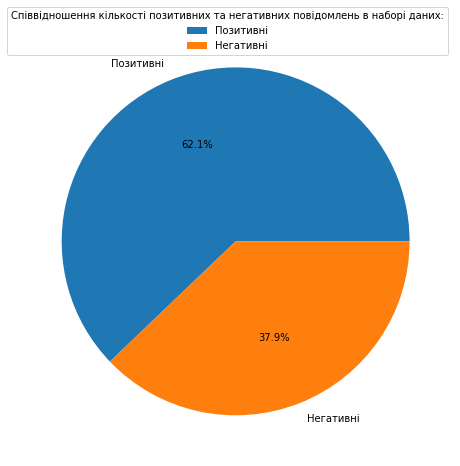

In [11]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([13333, 8122])
mylabels = ['Позитивні', 'Негативні']

plt.figure(figsize=(11, 8))
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor =(1, 1.05),title = "Співвідношення кількості позитивних та негативних повідомлень в наборі даних:")
plt.savefig('pos_neg_pie.png')

plt.show()

let's make one column for reaction type: 1 for positive, 0 for negative

In [12]:
data['reaction_type'] = data['pos_sum']

In [13]:
data = data.loc[:, ['msg_text', 'reaction_type']]

#Naive Bayes

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
bow = count_vec.fit_transform(data.msg_text)

X = bow
Y = data.reaction_type

In [15]:
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(X, Y, test_size = 0.30, stratify = Y, random_state=42)

In [16]:
from sklearn.naive_bayes import MultinomialNB
nb_cv = MultinomialNB(alpha = 0.01).fit(X_train_cv, Y_train_cv)

In [17]:
Y_pred_test = nb_cv.predict(X_test_cv)
Y_pred_train = nb_cv.predict(X_train_cv)

In [18]:
from sklearn.metrics import accuracy_score

print('Test set accuracy:', accuracy_score(Y_test_cv, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_cv, Y_pred_train))

Test set accuracy: 0.8117135311480503
Train set accuracy: 0.9605140498068984


In [19]:
from sklearn.metrics import f1_score

print('Test set F1 score:', f1_score(Y_test_cv, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_cv, Y_pred_train))

Test set F1 score: 0.8519423405814807
Train set F1 score: 0.9680202771935502


In [20]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vec = TfidfVectorizer()
bow_ti = tf_idf_vec.fit_transform(data.msg_text)
#bow_ti = np.array(bow_ti.todense())
bow_ti

<21455x74965 sparse matrix of type '<class 'numpy.float64'>'
	with 797946 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = bow_ti
Y = data.reaction_type

X_train_ti, X_test_ti, Y_train_ti, Y_test_ti = train_test_split(X, Y, test_size = 0.30, stratify = Y, random_state = 42)

nb_tf_idf = MultinomialNB(alpha = 0.01).fit(X_train_ti, Y_train_ti)

In [22]:
Y_pred_test = nb_tf_idf.predict(X_test_ti)
Y_pred_train = nb_tf_idf.predict(X_train_ti)

In [23]:
from sklearn.metrics import accuracy_score

print('Test set accuracy:', accuracy_score(Y_test_ti, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_ti, Y_pred_train))

Test set accuracy: 0.8179276060276527
Train set accuracy: 0.968504461313091


In [24]:
from sklearn.metrics import f1_score

print('Test set F1 score:', f1_score(Y_test_ti, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_ti, Y_pred_train))

Test set F1 score: 0.8612360880890363
Train set F1 score: 0.9747934985345058


#Misscalssified analysis

In [25]:
X_test_ser = pd.Series(tf_idf_vec.inverse_transform(X_test_ti))

In [26]:
Y_test_ti.reset_index(drop = True).loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))]

15      0
19      1
22      1
25      0
29      0
       ..
6416    0
6423    0
6426    0
6432    0
6436    0
Name: reaction_type, Length: 1172, dtype: int64

In [27]:
pd.set_option('display.max_colwidth', None)
misclass = pd.concat([X_test_ser.loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))],
          Y_test_ti.reset_index(drop = True).loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))],
          pd.Series(Y_pred_test).loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))]], axis = 1)
misclass.columns = ['text', 'true_reaction', 'pred_reaction']
misclass

,text,true_reaction,pred_reaction
15,"[окопуватись, тривогокупанти, стадію, посилені, позиційної, реагувати, попередив, перевести, оборонної, тижнями, взяли, сирени, найближчими, розумію, посилити, ракетні, тактику, намагається, операції, росія, бути, можуть, зараз, будуть, це, україни, обстріли, вони, війну, потрібно, україні, жданов, олег, експерт, військовий, як, повітряних, на, про]",0,1
19,"[соціологія, переселених, залишитись, центральні, закарпаття, показує, полтаві, їхали, евакуювати, регіони, говоримо, переселенців, полтавщині, хочуть, донецької, львівська, повномасштабної, 94, більшість, місяці, західні, найбільше, осіб, жити, 200, перші, ірина, верещук, сказала, тис, людей, область, із, області, ми, це, україни, війни, що, коли, сьогодні, планують, на, та, про]",1,0
22,"[розгорілася, захопленому, стався, загарбники, вибух, азовсталі, вибуху, самі, маріуполі, внаслідок, постраждали, пожежі, військами, російськими, яка, після, на]",1,0
25,"[ейфелеву, євдокименко, ротару, онук, сторіз, знімків, парижа, сторінки, розмістив, зумів, невдалої, парубок, легендарної, фотографії, схоже, софії, співачки, вежу, instagram, анатолій, втекти, своєї, спроби, ці, таки, видно, вдалося, вулиці, молдови, йому, виїхати, повідомив, столиці, франції, прокоментував, яких, україни, ніяк, до, як, після, само, так, не, на, декілька, та]",0,1
29,"[складами, схоже, запущені, придністров, помітили, звинувачують, дрони, традиційно, мвс, новини, невизнаної, стрілецької, військовими, останні, все, нашої, здійснили, крім, зброї, їх, над, повідомленням, республіки, саме, були, нібито, ua, підтримати, тсн, youtube, обстріли, україну, них, території, зі, того, за]",0,1
...,...,...,...
6416,"[сфальсифікує, псевдорефрендум, опозицію, збройний, прийнятного, обраного, ймовірністю, тимчасової, результату, приєднання, мирний, досягти, придушити, осені, широкомасштабний, голосування, опір, великою, британська, спробу, херсонської, колихаєва, ігоря, провести, територіях, затримали, водночас, триває, голову, міського, ймовірно, 28, неї, херсона, окупації, окупованих, тимчасово, розвідка, повідомляє, щодо, росія, щоб, області, року, 2022, росіяни, може, до, для, червня, за, на, рф]",0,1
6423,"[міграційній, новоазовську, получити, паспорту, реєстрацію, званій, прийому, подати, службі, документи, довідку, донецьку, документів, розпочали, спочатку, процедуру, громадянам, словами, андрющенко, петро, міського, отримання, маріуполі, голови, написав, радник, окупанти, днр, його, російського, це, російські, потрібно, для, потім, так, за, вже, рф, про]",0,1
6426,"[warпідписатися, клаптик, цивілізації, розміром, терористами, захоплено, вибратися, aw, жовтий, звільняє, повернеться, живуть, європейських, синьо, свободи, держав, територіях, кожен, квадратних, площа, джерело, пекла, кілометрів, war, досі, майже, можливості, навіть, 120, українців, against, землі, було, окупації, окупованих, тисяч, життя, прапор, деяких, нині, української, від, росія, мають, російськими, там, українці, але, ua, підтримати, тсн, youtube, під, ніж, більше, це, україни, які, не, за, на, та]",0,1
6432,"[коростені, очікуємо, офіційної, житомирської, вибух, інформації, повідомляють, області, про]",0,1


In [28]:
Y_test_ti[Y_test_ti == 1].shape

(4000,)

In [29]:
Y_test_ti.shape

(6437,)

In [30]:
misclass.loc[(misclass.true_reaction == 1) & (misclass.pred_reaction == 0)].shape

(363, 3)

#SVC

In [31]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = bow_ti
Y = data.reaction_type

svc_tf_idf = make_pipeline(StandardScaler(with_mean=False), SVC(C = 1, gamma='auto'))
svc_tf_idf.fit(X_train_ti, Y_train_ti)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=1, gamma='auto'))])

In [32]:
Y_pred_test = svc_tf_idf.predict(X_test_ti)
Y_pred_train = svc_tf_idf.predict(X_train_ti)

In [33]:
from sklearn.metrics import accuracy_score

print('Test set accuracy:', accuracy_score(Y_test_ti, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_ti, Y_pred_train))

Test set accuracy: 0.7829734348298897
Train set accuracy: 0.9823545079238247


In [34]:
from sklearn.metrics import f1_score

print('Test set F1 score:', f1_score(Y_test_ti, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_ti, Y_pred_train))

Test set F1 score: 0.8481026421659237
Train set F1 score: 0.9859229747675963


In [35]:
svc_cv = make_pipeline(StandardScaler(with_mean=False), SVC(C = 1, gamma='auto'))
svc_cv.fit(X_train_cv, Y_train_cv)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=1, gamma='auto'))])

In [36]:
Y_pred_test = svc_cv.predict(X_test_cv)
Y_pred_train = svc_cv.predict(X_train_cv)

In [37]:
print('Test set accuracy:', accuracy_score(Y_test_cv, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_cv, Y_pred_train))

print('Test set F1 score:', f1_score(Y_test_cv, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_cv, Y_pred_train))

Test set accuracy: 0.7907410284293925
Train set accuracy: 0.9687708083632974
Test set F1 score: 0.8531880108991826
Train set F1 score: 0.9753844538917755


#ROC

So now we have 4 models:
- nb_cv
- nb_tf_idf
- svc_cv
- svc_tf_idf


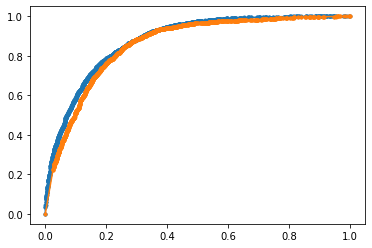

In [48]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

nb_cv_score = nb_cv.predict_proba(X_test_cv)
nb_tf_idf_score = nb_tf_idf.predict_proba(X_test_ti)
#svc_cv_score = svc_cv.predict_proba(X_test_cv)
#svc_tf_idf_score = svc_tf_idf.predict_proba(X_test_ti)

fpr_nb_cv_gnb, tpr_nb_cv_gnb, thresholds_gnb = roc_curve(Y_test_cv, nb_cv_score[:, 1])
fpr_nb_tf_idf, tpr_nb_tf_idf, _ = roc_curve(Y_test_ti, nb_tf_idf_score[:, 1])
#fpr_svc_cv, tpr_svc_cv, _ = roc_curve(Y_test_cv, svc_cv_score[:, 1])
#fpr_svc_tf_idf, tpr_svc_tf_idf, _ = roc_curve(Y_test_ti, svc_tf_idf_score[:, 1]) 

#plt.plot(fpr_svc_cv, tpr_svc_cv, marker='.', label = 'svc_cv')
#plt.plot(fpr_svc_tf_idf, tpr_svc_tf_idf, marker='.', label = 'svc_tf_idf')
plt.plot(fpr_nb_tf_idf, tpr_nb_tf_idf, marker='.', label='nb_ti')
plt.plot(fpr_nb_cv_gnb, tpr_nb_cv_gnb, marker='.', label='nb_cv')
